<a href="https://colab.research.google.com/github/KirtiNayak11/FlightPricePrediction/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing necessary libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Reading Dataset

In [125]:
df=pd.read_csv('/content/drive/MyDrive/Clean_Dataset[1].csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [126]:
df.sample(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
42981,42981,GO_FIRST,G8-334,Delhi,Early_Morning,one,Night,Chennai,Economy,12.67,49,4896
225456,225456,Air_India,AI-679,Mumbai,Morning,one,Evening,Delhi,Business,9.42,6,70171
13991,13991,Vistara,UK-829,Delhi,Early_Morning,one,Evening,Bangalore,Economy,10.25,21,7023
229098,229098,Vistara,UK-873,Mumbai,Early_Morning,one,Morning,Delhi,Business,26.67,41,41269
108449,108449,Vistara,UK-858,Bangalore,Early_Morning,one,Evening,Kolkata,Economy,13.25,41,6271
221266,221266,Vistara,UK-993,Delhi,Afternoon,one,Early_Morning,Hyderabad,Business,19.00,39,51697
258939,258939,Vistara,UK-852,Bangalore,Morning,one,Early_Morning,Hyderabad,Business,22.33,49,37985
164095,164095,GO_FIRST,G8-123,Hyderabad,Early_Morning,one,Night,Mumbai,Economy,14.25,39,5529
19440,19440,GO_FIRST,G8-717,Delhi,Evening,one,Late_Night,Bangalore,Economy,7.50,46,4508
52401,52401,Air_India,AI-652,Mumbai,Evening,one,Night,Delhi,Economy,25.42,47,6300


In [127]:
df.shape

(300153, 12)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [128]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


Dropping Unwanted Columns

In [129]:
df=df.drop(columns=['Unnamed: 0','flight'])

In [130]:
df.shape

(300153, 10)

In [131]:
df.sample(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
116499,Indigo,Bangalore,Morning,zero,Morning,Chennai,Economy,1.08,14,3498
112212,Vistara,Bangalore,Night,one,Afternoon,Hyderabad,Economy,15.42,23,6133
84017,Vistara,Mumbai,Evening,one,Night,Chennai,Economy,25.75,49,4663
45089,AirAsia,Mumbai,Early_Morning,zero,Morning,Delhi,Economy,2.17,13,6127
259581,Vistara,Bangalore,Morning,one,Night,Chennai,Business,10.50,17,60396


Getting independent and dependent attributes

In [132]:
x=df.drop(['price'],axis=1)
x.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1


In [133]:
x.shape

(300153, 9)

In [134]:
y=df['price']
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [135]:
y.shape

(300153,)

#Splitting Dataset into Train and Test Sets

In [136]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=25)

In [137]:
xtrain.shape

(240122, 9)

In [138]:
ytrain.shape

(240122,)

In [139]:
xtest.shape

(60031, 9)

In [140]:
ytest.shape

(60031,)

##Data Cleaning

**Checking for null values in the dataset**

In [141]:
df.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

#Detecting Outliers

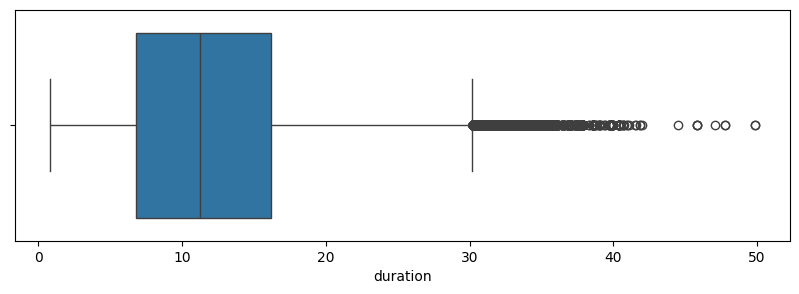

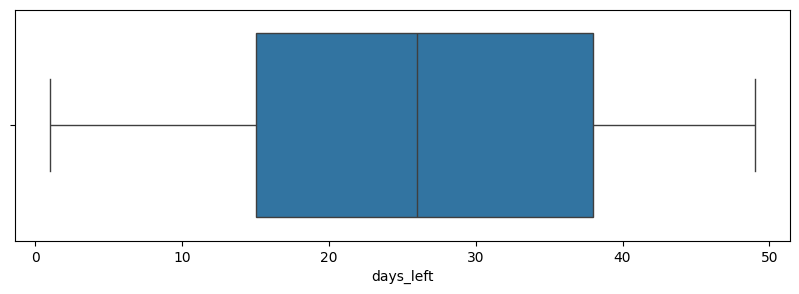

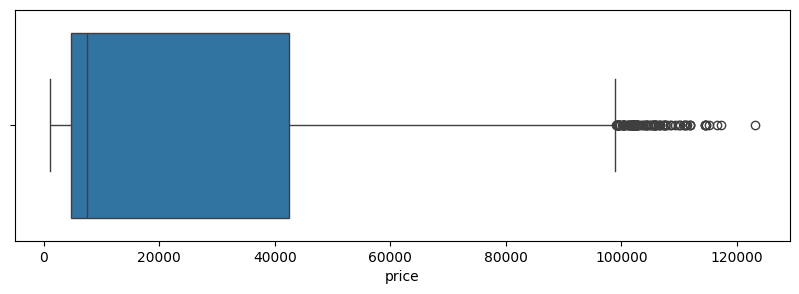

In [142]:
count=df.select_dtypes(include=np.number)
for i in count:
  plt.figure(figsize=(10,3))
  sns.boxplot(df,x=i)
  plt.show()

#Handling Outliers

percentile25  4783.0
percentile75  42521.0
upper_limit  99128.0
lower_limit  -51824.0


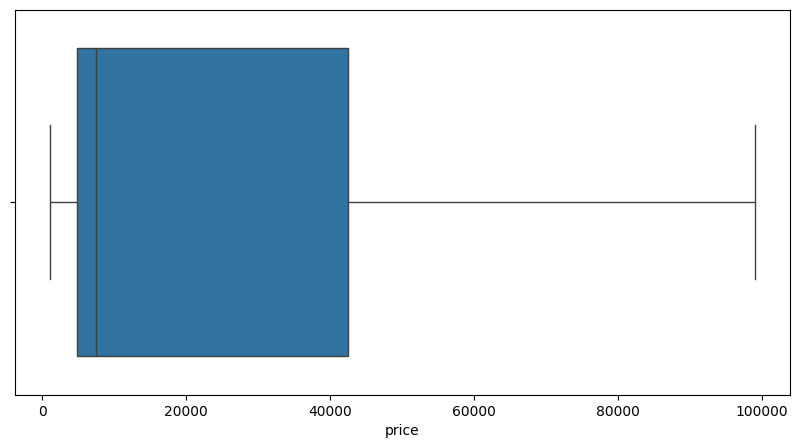

In [143]:
percentile25=df['price'].quantile(0.25)
percentile75=df['price'].quantile(0.75)
print('percentile25 ',percentile25)
print('percentile75 ',percentile75)
iqr=percentile75-percentile25
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr
print('upper_limit ',upper_limit)
print('lower_limit ',lower_limit)
filtered_data = df['price'][(df['price'] >= lower_limit) & (df['price']<=upper_limit)]
df['price']= filtered_data
plt.figure(figsize=(10,5))
sns.boxplot(df,x='price')
plt.show()

percentile25  6.83
percentile75  15.0
upper_limit  27.255
lower_limit  -5.424999999999999


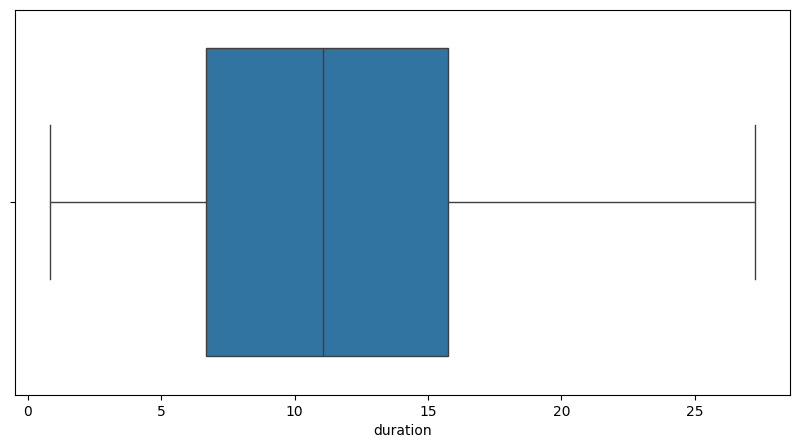

In [144]:
percentile25=df['duration'].quantile(0.25)
percentile75=df['duration'].quantile(0.70)
print('percentile25 ',percentile25)
print('percentile75 ',percentile75)
iqr=percentile75-percentile25
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr
print('upper_limit ',upper_limit)
print('lower_limit ',lower_limit)
filtered_data = df['duration'][(df['duration'] >= lower_limit) & (df['duration']<=upper_limit)]
df['duration']= filtered_data
plt.figure(figsize=(10,5))
sns.boxplot(df,x='duration')
plt.show()

**Encoding categorical values to numeric**

In [145]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [146]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [147]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False,drop='first')
ohe.fit(xtrain[['airline','source_city','departure_time','arrival_time','destination_city']])
xtrainOhe=ohe.transform(xtrain[['airline','source_city','departure_time','arrival_time','destination_city']])
xtrainOhe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [148]:
xtestOhe=ohe.transform(xtest[['airline','source_city','departure_time','arrival_time','destination_city']])
xtestOhe

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [149]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[['zero','one','two_or_more'],['Economy','Business']])
ord.fit(xtrain[['stops','class']])
xtrainOrd=ord.transform(xtrain[['stops','class']])
xtrainOrd

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       ...,
       [0., 0.],
       [2., 0.],
       [0., 0.]])

In [150]:
xtestOrd=ord.transform(xtest[['stops','class']])
xtestOrd

array([[0., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 1.],
       [2., 0.],
       [1., 1.]])

**deleting the unwanted columns(encoded categorical columns)**

In [151]:
xtrain.sample(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
220093,Vistara,Delhi,Evening,one,Afternoon,Hyderabad,Business,19.50,19
259962,Air_India,Bangalore,Evening,one,Morning,Chennai,Business,15.08,24
229491,Air_India,Mumbai,Evening,one,Evening,Delhi,Business,24.33,45
254033,Air_India,Bangalore,Afternoon,one,Evening,Kolkata,Business,5.83,20
20119,SpiceJet,Delhi,Morning,one,Morning,Bangalore,Economy,21.50,49


In [152]:
del_xtrain=xtrain.drop(['stops','class','airline','source_city','departure_time','arrival_time','destination_city'],axis=1)

In [153]:
del_xtrain

,duration,days_left
154862,5.25,22
253148,8.33,7
270966,18.33,17
143014,2.17,7
54524,13.58,12
...,...,...
130365,6.67,20
92303,2.75,41
6618,2.17,34
90430,8.75,33


In [154]:
del_xtest=xtest.drop(['stops','class','airline','source_city','departure_time','arrival_time','destination_city'],axis=1)

In [155]:
encoded_df_xtrain=np.concatenate((del_xtrain,xtrainOrd,xtrainOhe),axis=1)
encoded_df_xtrain

array([[ 5.25, 22.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [ 8.33,  7.  ,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [18.33, 17.  ,  1.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 2.17, 34.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [ 8.75, 33.  ,  2.  , ...,  0.  ,  0.  ,  0.  ],
       [ 2.08, 11.  ,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [156]:
encoded_df_xtrain.shape

(240122, 29)

In [157]:
encoded_df_xtest=np.concatenate((del_xtest,xtestOrd,xtestOhe),axis=1)
encoded_df_xtest

array([[ 2.17, 11.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [24.58, 13.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [ 8.75, 29.  ,  1.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [25.92, 29.  ,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [23.83, 37.  ,  2.  , ...,  0.  ,  0.  ,  1.  ],
       [22.33, 16.  ,  1.  , ...,  0.  ,  1.  ,  0.  ]])

In [158]:
encoded_df_xtest.shape

(60031, 29)

#Applying Normalization Technique

In [159]:
scaler=MinMaxScaler()
scaler.fit(encoded_df_xtrain)
xtrain_normalized_data = scaler.transform(encoded_df_xtrain)
xtest_normalized_data = scaler.transform(encoded_df_xtest)

In [160]:
std=StandardScaler()
std.fit(encoded_df_xtrain)
xtrain_std_data = std.transform(encoded_df_xtrain)
xtest_std_data = std.transform(encoded_df_xtest)

#Building and Evaluating Regression Models

#LinearRegression

In [163]:
LM = LinearRegression()
LM.fit(xtrain_std_data , ytrain)

y_pred = LM.predict(xtest_std_data )
ypred=y_pred.astype(int)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 46345900.04351847


#DecisionTreeRegressor

In [164]:
tree_model = DecisionTreeRegressor()

tree_model.fit(encoded_df_xtrain, ytrain)

tree_predictions = tree_model.predict(encoded_df_xtest)

tree_mse = mean_squared_error(ytest, tree_predictions)
print(f"Decision Tree Mean Squared Error: {tree_mse}")

Decision Tree Mean Squared Error: 12074156.365494495


#RandomForestRegression

In [165]:
forest_model = RandomForestRegressor()

forest_model.fit(encoded_df_xtrain, ytrain)

forest_predictions = forest_model.predict(encoded_df_xtest)

forest_mse = mean_squared_error(ytest, forest_predictions)
print(f"Random Forest Mean Squared Error: {forest_mse}")

Random Forest Mean Squared Error: 7582466.930668207


#Support Vector Regression (SVR)

In [ ]:
svr_model = SVR()

svr_model.fit(xtrain_normalized_data, ytrain)

svr_predictions = svr_model.predict(xtest_normalized_data)

svr_mse = mean_squared_error(ytest, svr_predictions)
print(f"Random Forest Mean Squared Error: {forest_mse}")

#K-Nearest Neighbors(KNN)

In [ ]:
knn_model = KNeighborsRegressor()

knn_model.fit(xtrain_normalized_data, ytrain)

knn_predictions = knn_model.predict(xtest_normalized_data)

knn_mse = mean_squared_error(ytest, knn_predictions)
print(f"Random Forest Mean Squared Error: {forest_mse}")

#Applying cross_val_score over Regression models

In [166]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, xtrain_std_data, ytrain, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, xtest_std_data, ytest, cv=5, scoring='r2')))

training 0.9101044124953029
testing 0.9092934123344399


In [167]:
model = DecisionTreeRegressor()

print("training",np.mean(cross_val_score(model, encoded_df_xtrain, ytrain, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, encoded_df_xtest,ytest, cv=5, scoring='r2')))

training 0.9753677588323569
testing 0.9661787165643363


In [ ]:
model = RandomForestRegressor()

print("training",np.mean(cross_val_score(model, encoded_df_xtrain, ytrain, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, encoded_df_xtest, ytest, cv=5, scoring='r2')))

In [ ]:
model = SVR()

print("training",np.mean(cross_val_score(model, xtrain_std_data, ytrain, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, xtest_std_data, ytest, cv=5, scoring='r2')))

In [ ]:
model = KNeighborsRegressor()

print("training",np.mean(cross_val_score(model, xtrain_normalized_data, ytrain, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, xtest_normalized_data, ytest, cv=5, scoring='r2')))